# UMAP simple usage

## Requirements:



llvmlite                       0.40.1

matplotlib                     3.4.3

matplotlib-inline              0.1.3

notebook                       6.4.4
numba                          0.57.1

numpy                          1.21.2

Pillow                         8.3.2
pip                            21.1.3

scikit-learn                   1.3.0
scipy                          1.10.1

terminado                      0.12.1

testpath                       0.5.0

threadpoolctl                  3.2.0

torch                          1.8.1+cu111

torchvision                    0.9.1+cu111


tqdm                           4.61.2

umap-learn                     0.5.3


# 3D feature of CIFAR-100 on Pretrained Resnet-18

Files already downloaded and verified


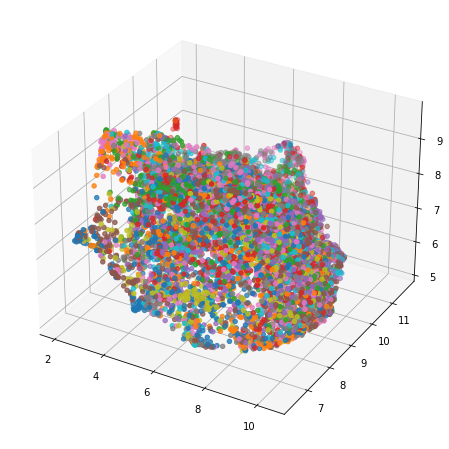

In [2]:
import torch  
import torchvision  
import umap  
import matplotlib.pyplot as plt  
  
# 检查PyTorch是否可以使用CUDA加速  
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")  
  
# 加载预训练的ResNet-18模型  
model = torchvision.models.resnet18(pretrained=True)  
model = model.to(device)  
model.eval()  
  
# 加载CIFAR-100测试数据集  
transform = torchvision.transforms.Compose([  
    torchvision.transforms.ToTensor(),  
    torchvision.transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))  
])  
testset = torchvision.datasets.CIFAR100(root='./data/cifar-100', train=False, download=True, transform=transform)  
testloader = torch.utils.data.DataLoader(testset, batch_size=128, shuffle=False, num_workers=2)  
  
# 提取测试集特征  
test_features = []  
test_labels = []  
with torch.no_grad():  
    for images, labels in testloader:  
        images = images.to(device)  
        labels = labels.to(device)  
        features = model(images).cpu().numpy()  
        test_features.extend(features)  
        test_labels.extend(labels.cpu().numpy())  
  
test_features = torch.tensor(test_features)  
  
# 使用Umap进行特征可视化  
reducer = umap.UMAP(n_components=3)  
embedding = reducer.fit_transform(test_features)  
  
# 绘制可视化结果  
fig = plt.figure(figsize=(8, 8))  
ax = fig.add_subplot(111, projection='3d')  
ax.scatter(embedding[:, 0], embedding[:, 1], embedding[:, 2], c=test_labels, cmap='tab10')  
plt.show()  

# 3D feature of CIFAR-100 on Fine-tuned Resnet-18

Files already downloaded and verified
Files already downloaded and verified
Epoch 1/50 Loss: 2.9845 Accuracy: 0.2609
Epoch 2/50 Loss: 2.2703 Accuracy: 0.4012
Epoch 3/50 Loss: 2.0245 Accuracy: 0.4534
Epoch 4/50 Loss: 1.8645 Accuracy: 0.4883
Epoch 5/50 Loss: 1.7475 Accuracy: 0.5158
Epoch 6/50 Loss: 1.6455 Accuracy: 0.5412
Epoch 7/50 Loss: 1.5874 Accuracy: 0.5517
Epoch 8/50 Loss: 1.4841 Accuracy: 0.5783
Epoch 9/50 Loss: 1.4150 Accuracy: 0.5938
Epoch 10/50 Loss: 1.3545 Accuracy: 0.6098
Epoch 11/50 Loss: 1.2990 Accuracy: 0.6213
Epoch 12/50 Loss: 1.2339 Accuracy: 0.6396
Epoch 13/50 Loss: 1.1893 Accuracy: 0.6486
Epoch 14/50 Loss: 1.1463 Accuracy: 0.6598
Epoch 15/50 Loss: 1.1049 Accuracy: 0.6694
Epoch 16/50 Loss: 1.0524 Accuracy: 0.6841
Epoch 17/50 Loss: 1.0039 Accuracy: 0.6959
Epoch 18/50 Loss: 1.0052 Accuracy: 0.6963
Epoch 19/50 Loss: 0.9283 Accuracy: 0.7158
Epoch 20/50 Loss: 0.9059 Accuracy: 0.7232
Epoch 21/50 Loss: 0.8467 Accuracy: 0.7394
Epoch 22/50 Loss: 0.8083 Accuracy: 0.7512
Epoch 23/

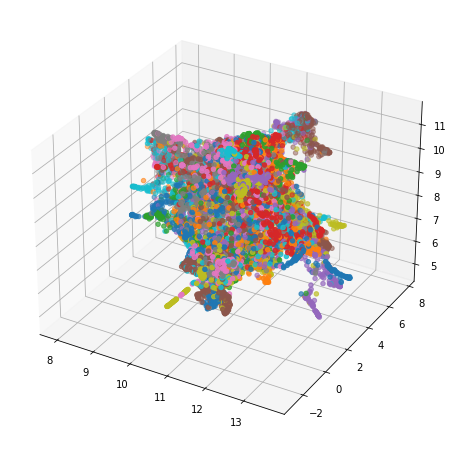

In [3]:
  
import torch  
import torchvision  
import torchvision.transforms as transforms  
import umap  
import matplotlib.pyplot as plt  
  
# 设置随机种子，以便结果可复现  
torch.manual_seed(42)  
  
# 检查是否可使用CUDA加速  
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")  
  
# 定义数据预处理的转换  
transform = transforms.Compose([  
    transforms.RandomCrop(32, padding=4),  
    transforms.RandomHorizontalFlip(),  
    transforms.ToTensor(),  
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))  
])  
  
# 加载CIFAR-100训练集和测试集  
trainset = torchvision.datasets.CIFAR100(root='./data/cifar-100', train=True, download=True, transform=transform)  
testset = torchvision.datasets.CIFAR100(root='./data/cifar-100', train=False, download=True, transform=transform)  
  
# 定义数据加载器  
batch_size = 128  
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size, shuffle=True, num_workers=2)  
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size, shuffle=False, num_workers=2)  
  
# 加载预训练的ResNet-18模型，并解冻所有参数  
model = torchvision.models.resnet18(pretrained=True)  
num_classes = 100  
model.fc = torch.nn.Linear(model.fc.in_features, num_classes)  
  
model = model.to(device)  
  
# 定义损失函数和优化器  
criterion = torch.nn.CrossEntropyLoss()  
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)  
  
# 定义计算精度的函数  
def calculate_accuracy(outputs, labels):  
    _, predicted = torch.max(outputs, 1)  
    correct = (predicted == labels).sum().item()  
    total = labels.size(0)  
    accuracy = correct / total  
    return accuracy  
  
# 训练微调模型  
num_epochs = 50  
  
for epoch in range(num_epochs):  
    running_loss = 0.0  
    total_accuracy = 0.0  
  
    for i, (inputs, labels) in enumerate(trainloader):  
        inputs = inputs.to(device)  
        labels = labels.to(device)  
  
        optimizer.zero_grad()  
  
        outputs = model(inputs)  
        loss = criterion(outputs, labels)  
        loss.backward()  
        optimizer.step()  
  
        running_loss += loss.item()  
  
        # 计算精度  
        accuracy = calculate_accuracy(outputs, labels)  
        total_accuracy += accuracy  
  
    epoch_loss = running_loss / len(trainloader)  
    epoch_accuracy = total_accuracy / len(trainloader)  
    print(f"Epoch {epoch+1}/{num_epochs} Loss: {epoch_loss:.4f} Accuracy: {epoch_accuracy:.4f}")  
  
# 提取测试集特征  
test_features = []  
test_labels = []  
model.eval()  
with torch.no_grad():  
    for images, labels in testloader:  
        images = images.to(device)  
        labels = labels.to(device)  
        features = model(images).cpu().numpy()  
        test_features.extend(features)  
        test_labels.extend(labels.cpu().numpy())  
  
test_features = torch.tensor(test_features)  
  
# 使用Umap进行特征可视化  
reducer = umap.UMAP(n_components=3)  
embedding = reducer.fit_transform(test_features)  
  
# 绘制可视化结果  
fig = plt.figure(figsize=(8, 8))  
ax = fig.add_subplot(111, projection='3d')  
ax.scatter(embedding[:, 0], embedding[:, 1], embedding[:, 2], c=test_labels, cmap='tab10')  
plt.show()  

# 2D feature of CIFAR-10 on Pretrained & Fine-tuned Resnet-18

Files already downloaded and verified
Files already downloaded and verified


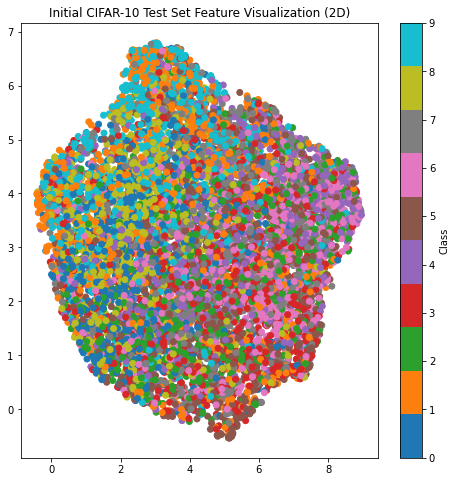

Epoch 1/50 Loss: 1.6246 Accuracy: 0.3831
Epoch 2/50 Loss: 1.0577 Accuracy: 0.6282
Epoch 3/50 Loss: 0.8556 Accuracy: 0.7045
Epoch 4/50 Loss: 0.7707 Accuracy: 0.7346
Epoch 5/50 Loss: 0.6997 Accuracy: 0.7605
Epoch 6/50 Loss: 0.6491 Accuracy: 0.7758
Epoch 7/50 Loss: 0.6230 Accuracy: 0.7865
Epoch 8/50 Loss: 0.5865 Accuracy: 0.7990
Epoch 9/50 Loss: 0.5649 Accuracy: 0.8059
Epoch 10/50 Loss: 0.5474 Accuracy: 0.8121
Epoch 11/50 Loss: 0.5215 Accuracy: 0.8194
Epoch 12/50 Loss: 0.5071 Accuracy: 0.8254
Epoch 13/50 Loss: 0.4943 Accuracy: 0.8290
Epoch 14/50 Loss: 0.4759 Accuracy: 0.8349
Epoch 15/50 Loss: 0.4684 Accuracy: 0.8384
Epoch 16/50 Loss: 0.4528 Accuracy: 0.8443
Epoch 17/50 Loss: 0.4467 Accuracy: 0.8467
Epoch 18/50 Loss: 0.4423 Accuracy: 0.8466
Epoch 19/50 Loss: 0.4248 Accuracy: 0.8543
Epoch 20/50 Loss: 0.4178 Accuracy: 0.8547
Epoch 21/50 Loss: 0.4074 Accuracy: 0.8586
Epoch 22/50 Loss: 0.3987 Accuracy: 0.8601
Epoch 23/50 Loss: 0.3926 Accuracy: 0.8629
Epoch 24/50 Loss: 0.3811 Accuracy: 0.8666
E

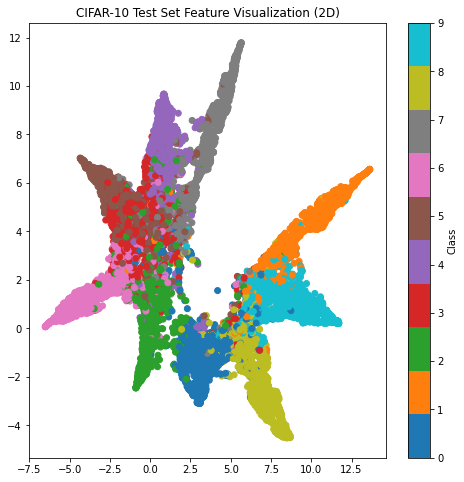

In [6]:
import torch  
import torch.nn as nn  
import torch.optim as optim  
import torchvision  
import torchvision.transforms as transforms  
import umap  
import matplotlib.pyplot as plt  
  
# 设置随机种子以确保结果可重现  
torch.manual_seed(42)  
  
# 检查是否可使用CUDA加速  
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")  
  
# 定义数据预处理的转换  
transform = transforms.Compose([  
    transforms.RandomCrop(32, padding=4),  
    transforms.RandomHorizontalFlip(),  
    transforms.ToTensor(),  
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))  
])  
  
# 加载CIFAR-10训练集和测试集  
trainset = torchvision.datasets.CIFAR10(root='./data/cifar-10', train=True, download=True, transform=transform)  
testset = torchvision.datasets.CIFAR10(root='./data/cifar-10', train=False, download=True, transform=transform)  
  
# 定义数据加载器  
batch_size = 128  
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size, shuffle=True, num_workers=2)  
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size, shuffle=False, num_workers=2)  
  
# 加载预训练的ResNet-18模型  
model = torchvision.models.resnet18(pretrained=True)  
num_classes = 10  
model.fc = nn.Linear(model.fc.in_features, num_classes)  
model = model.to(device)  
  
# 提取测试集特征并进行2维特征可视化  
def visualize_features(data, labels, title):  
    model.eval()  
    with torch.no_grad():  
        features = []  
        for images, _ in data:  
            images = images.to(device)  
            outputs = model(images)  
            features.extend(outputs.cpu().numpy())  
      
    reducer = umap.UMAP(n_components=2)  
    embedding = reducer.fit_transform(features)  
      
    plt.figure(figsize=(8, 8))  
    plt.scatter(embedding[:, 0], embedding[:, 1], c=labels, cmap='tab10')  
    plt.title(title)  
    plt.colorbar(ticks=range(10), label='Class')  
    plt.show()  
  
# 初始测试集特征可视化（3维）  
visualize_features(testloader, testset.targets, "Initial CIFAR-10 Test Set Feature Visualization (2D)")  
  
# 定义损失函数和优化器  
criterion = nn.CrossEntropyLoss()  
optimizer = optim.Adam(model.parameters(), lr=0.001)  
  
# 训练微调模型  
num_epochs = 50  
  
for epoch in range(num_epochs):  
    running_loss = 0.0  
    total_accuracy = 0.0  
  
    for i, (inputs, labels) in enumerate(trainloader):  
        inputs = inputs.to(device)  
        labels = labels.to(device)  
  
        optimizer.zero_grad()  
  
        outputs = model(inputs)  
        loss = criterion(outputs, labels)  
        loss.backward()  
        optimizer.step()  
  
        running_loss += loss.item()  
  
        # 计算精度  
        _, predicted = torch.max(outputs, 1)  
        correct = (predicted == labels).sum().item()  
        total = labels.size(0)  
        accuracy = correct / total  
        total_accuracy += accuracy  
  
    epoch_loss = running_loss / len(trainloader)  
    epoch_accuracy = total_accuracy / len(trainloader)  
    print(f"Epoch {epoch+1}/{num_epochs} Loss: {epoch_loss:.4f} Accuracy: {epoch_accuracy:.4f}")  
  
# 重新提取测试集特征并进行2维特征可视化  
visualize_features(testloader, testset.targets, "CIFAR-10 Test Set Feature Visualization (2D)")  